Train and fine tune a decision tree using the wine dataset by following the following steps:-

  1. Use load_wine() to generate wine dataset
  2. Split the dataset into train and test  dataset
  3. Use random search CV to hyperparameter tune the Decision Tree
  4. Try to achieve an accuracy of at least 85%

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [63]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [65]:
df.duplicated().sum()

0

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: >

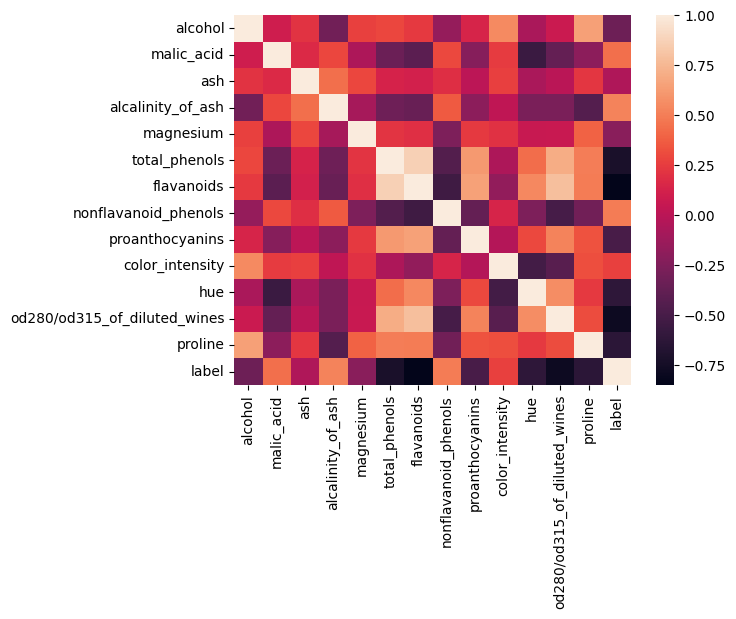

In [67]:
sns.heatmap(df.corr())

In [68]:
# Compute the correlation matrix
corr_matrix = df.corr()

corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [69]:
# Filter the correlation matrix

filtered_corr_matrix = corr_matrix.where(corr_matrix > 0.5)

filtered_corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
alcohol,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546364,NaN,NaN,0.64372,NaN
malic_acid,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ash,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcalinity_of_ash,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.517859
magnesium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_phenols,NaN,NaN,NaN,NaN,NaN,1.000000,0.864564,NaN,0.612413,NaN,NaN,0.699949,NaN,NaN
flavanoids,NaN,NaN,NaN,NaN,NaN,0.864564,1.000000,NaN,0.652692,NaN,0.543479,0.787194,NaN,NaN
nonflavanoid_phenols,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
proanthocyanins,NaN,NaN,NaN,NaN,NaN,0.612413,0.652692,NaN,1.000000,NaN,NaN,0.519067,NaN,NaN
color_intensity,0.546364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [70]:
for feat in df.columns:
    print("Feature: {} has {} unique values".format(feat, df[feat].nunique()))

df['label'].unique()

Feature: alcohol has 126 unique values
Feature: malic_acid has 133 unique values
Feature: ash has 79 unique values
Feature: alcalinity_of_ash has 63 unique values
Feature: magnesium has 53 unique values
Feature: total_phenols has 97 unique values
Feature: flavanoids has 132 unique values
Feature: nonflavanoid_phenols has 39 unique values
Feature: proanthocyanins has 101 unique values
Feature: color_intensity has 132 unique values
Feature: hue has 78 unique values
Feature: od280/od315_of_diluted_wines has 122 unique values
Feature: proline has 121 unique values
Feature: label has 3 unique values


array([0, 1, 2])

* All independent features are of continous in nature
* Dependant feature (target) is of categorical in nature, hence its a multiclass classification problem

In [71]:
X = df.drop(columns=['label'], axis=1)
y = df[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [72]:
# normalizing values

scaler = StandardScaler().set_output(transform="pandas")

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Decision Tree classifier hyperparameters

params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2, 20, 3),
    'min_samples_split': range(2, 20, 3),
    'min_samples_leaf': range(1, 20, 3),
    'max_features': ['sqrt', 'log2']
}

cv = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params, cv = 5, n_iter = 10, n_jobs=-1)

cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20, 3),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(1, 20, 3),
                                        'min_samples_split': range(2, 20, 3),
                                        'splitter': ['best', 'random']})

In [74]:
print(" Results from Random Search on Training Dataset " )
print("\n The best estimator across ALL searched params:\n", cv.best_estimator_)
print("\n The best score across ALL searched params:\n", cv.best_score_)
print("\n The best parameters across ALL searched params:\n", cv.best_params_)

 Results from Random Search on Training Dataset 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       min_samples_leaf=4, min_samples_split=17)

 The best score across ALL searched params:
 0.8981481481481481

 The best parameters across ALL searched params:
 {'splitter': 'best', 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy'}


In [75]:
model = DecisionTreeClassifier(**cv.best_params_)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       min_samples_leaf=4, min_samples_split=17)

In [76]:
y_pred_train = model.predict(X_train)

y_pred = model.predict(X_test)

In [77]:
print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))

Accuracy: 0.875


FInal Accuracy is 90% on Test dataset